In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore,boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing The Dataset

In [75]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are total 18249 rows in the above dataset and 14 columns.
Some of the columns are numeric and some are of categorial type.
This is a Regression problem if considering dependent variable as average Price and Classification problem is region is output variable.
There are no missing rows in the columns.



In [76]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Name of each columns is displayed above.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


This command displays the count of each column and the dtype of each column.

In [78]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

This shows that there are no null values in the each column.

In [79]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

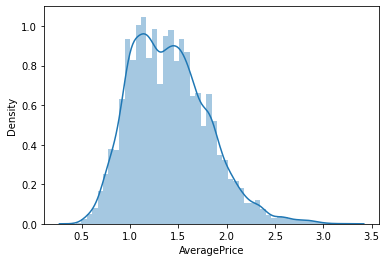

In [80]:
sns.distplot(df['AveragePrice'])

Considering the above plot shows the distribution of average price and we can see that there is slight skewness that is beacause of outliers present in the column.

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

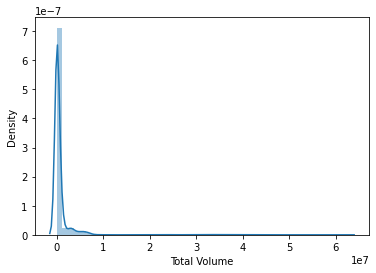

In [81]:
sns.distplot(df['Total Volume'])

Again the curve is highly skewed beacuse of the presence of outliers.

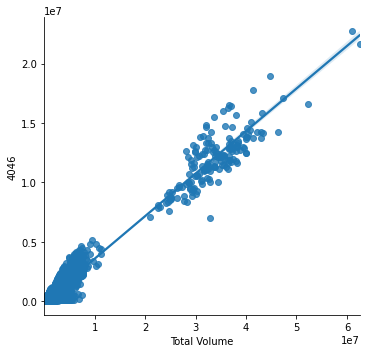

In [82]:
sns.lmplot(x='Total Volume',y='4046',data=df)

Ploting the total volume and PLU 4046 we can see that they are positively corelated to each other.

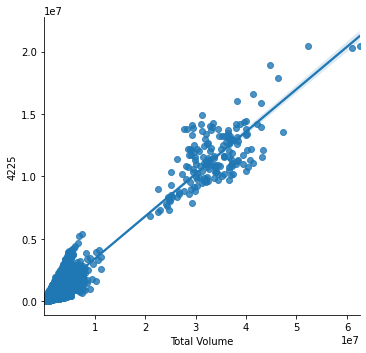

In [83]:
sns.lmplot(x='Total Volume',y='4225',data=df)

Ploting Total Volume against PLU 4225 they are positively corelated to each other.

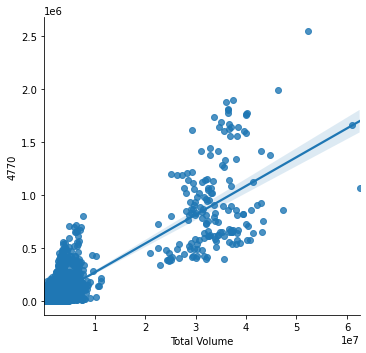

In [84]:
sns.lmplot(x='Total Volume',y='4770',data=df)

Ploting Total Volume against PLU 4770 they are positively corelated to each other.

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

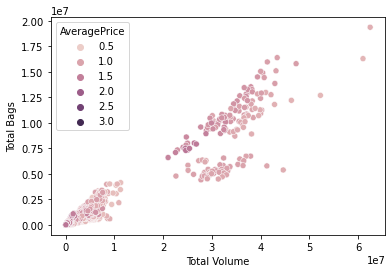

In [85]:
sns.scatterplot(x='Total Volume',y='Total Bags',hue='AveragePrice',data=df)

Increasing bags Volume is also increasing and the average price lie between 0.5-1.5.

<AxesSubplot:xlabel='Total Volume', ylabel='Small Bags'>

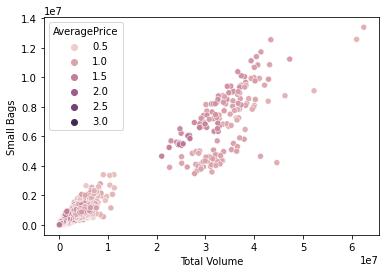

In [86]:
sns.scatterplot(x='Total Volume',y='Small Bags',hue='AveragePrice',data=df)

Increasing small bags Volume is also increasing and the average price lie between 0.5-1.5.

<AxesSubplot:xlabel='Total Volume', ylabel='XLarge Bags'>

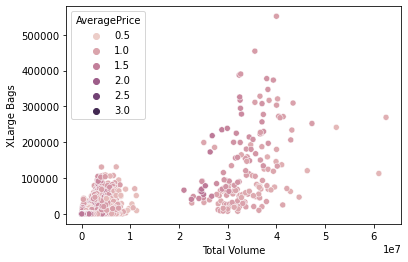

In [87]:
sns.scatterplot(x='Total Volume',y='XLarge Bags',hue='AveragePrice',data=df)

Increasing XLarge bags Volume is also increasing and the average price lie between 0.5-1.5.

<AxesSubplot:xlabel='Total Volume', ylabel='Large Bags'>

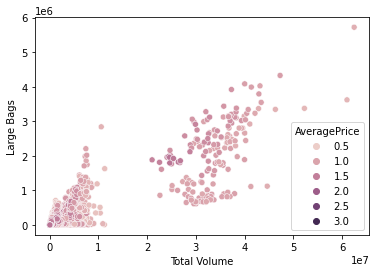

In [88]:
sns.scatterplot(x='Total Volume',y='Large Bags',hue='AveragePrice',data=df)

Increasing Large bags Volume is also increasing and the average price lie between 0.5-1.5.

<AxesSubplot:xlabel='type', ylabel='count'>

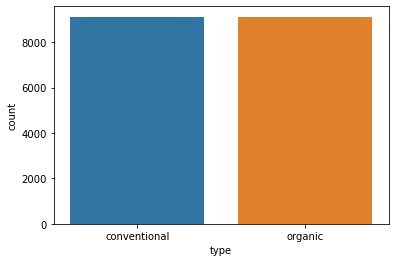

In [89]:
sns.countplot(x='type',data=df)

There are tew type os avocaodo......and the count of each is equal.

Unnamed: 0         AxesSubplot(0.125,0.536818;0.110714x0.343182)
AveragePrice    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Small Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.390714,0.125;0.110714x0.343182)
XLarge Bags        AxesSubplot(0.523571,0.125;0.110714x0.343182)
year               AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

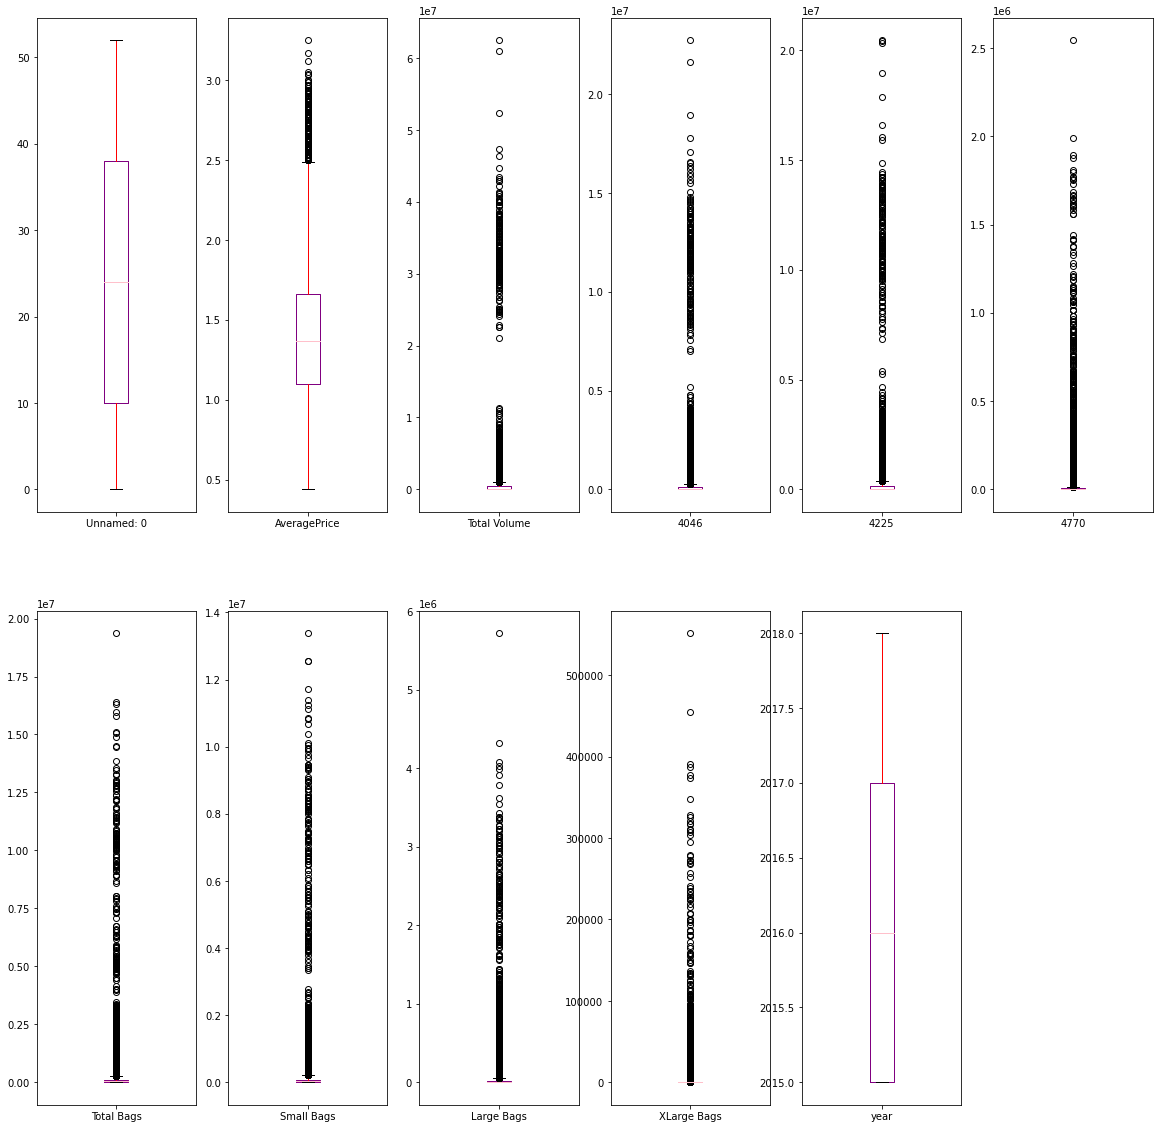

In [90]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,20),color=color)

In the above plot we can see the presence of outliers in the various columns and because of which the skewness is there in the data.

<AxesSubplot:>

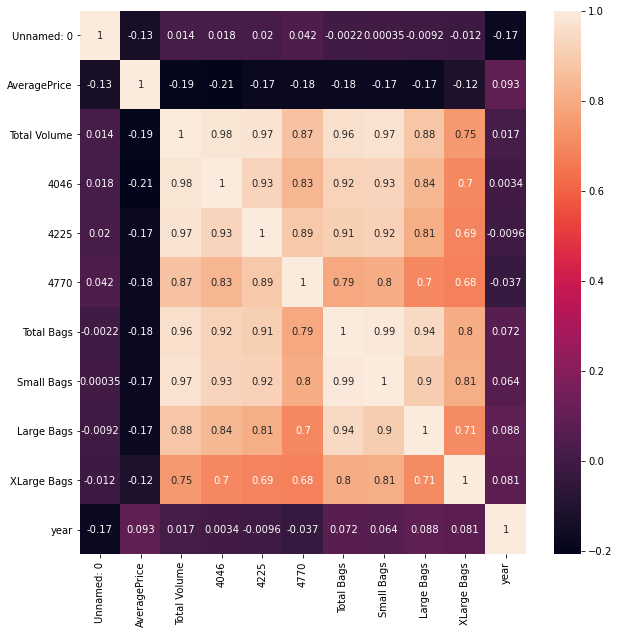

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In the above heatmap, we can see that the total volume and 4046 are highly corelated.
Infact, columns like total volume, 4046,4225,4770, total bags, small bags, large bags are postively corelated.


# Data Cleaning/Preprocessing

In [92]:
df['region'].value_counts()

Charlotte              338
HarrisburgScranton     338
West                   338
Albany                 338
MiamiFtLauderdale      338
Boston                 338
SanDiego               338
SouthCentral           338
Atlanta                338
Columbus               338
NewYork                338
Midsouth               338
Northeast              338
Jacksonville           338
StLouis                338
California             338
HartfordSpringfield    338
Detroit                338
Southeast              338
Boise                  338
RichmondNorfolk        338
Syracuse               338
Louisville             338
NorthernNewEngland     338
BuffaloRochester       338
NewOrleansMobile       338
Orlando                338
PhoenixTucson          338
Nashville              338
Houston                338
GrandRapids            338
Philadelphia           338
CincinnatiDayton       338
SouthCarolina          338
Plains                 338
Seattle                338
Tampa                  338
P

Value counts or each region are equal there is no need for SMOTE.

In [93]:
df.drop(df.columns[0],axis=1,inplace=True) #Feature Engineering

In [94]:
df.drop(['Date','year'],axis=1,inplace=True) #Feature engineering

As the index is already present we dont need to have another index and date and year are giving no contribution we can drop that. As all other columns are giving us important piece of information and losing furthur data may effect our results so not performing VIF Factor calculation.

In [95]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


# Label Encoding

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['type','region']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [97]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


Converting the categorial data in numeric form.

# Skewness and Outliers

In [98]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
dtype: float64

Data is highly skewed...to remove skewness we will first remove the outliers.

In [99]:
z=np.abs(zscore(df))    #removing outliers
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


Removing the outliers so that the data can be normal distributed.

In [100]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

Still the skewness is there we can remove this skewness using yeo-johnson transformation.

<AxesSubplot:>

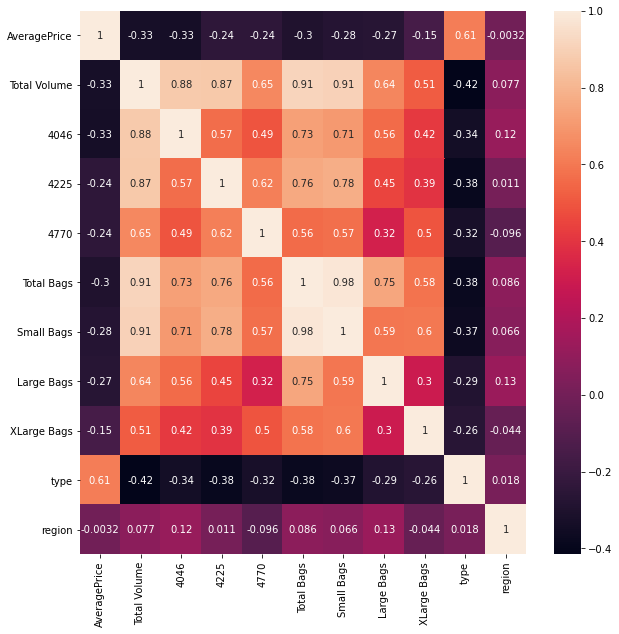

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True)

Analysing above heatmap from region point of view where we can see that average price is giving its least contribution in determining the region.
Total bags are giving the maximum contribution in analysing the same.

In [102]:
df_copy=df_new.copy()
df_copy

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


Craeting a copy of dataset as we will be perfroming the regression as well as classification.

## Dividing Dataset into X(Independent) and Y(Dependent) where Predicting Average Price

In [104]:
x=df_new.iloc[:,1:]  #Independent variable
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


In [105]:
y=df_new.iloc[:,0]  #Dependent Variable.
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

# Removing Skewness and Performing Standard Scaling

In [106]:
from sklearn.preprocessing import power_transform,StandardScaler
x=power_transform(x,method='yeo-johnson')
x   #Removing the skewness using yeo-johnson.


array([[-0.07532391, -0.65742071,  0.35142978, ..., -0.67791909,
        -1.01904715, -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ..., -0.67791909,
        -1.01904715, -2.01058988],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -0.67791909,
        -1.01904715, -2.01058988],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -0.67791909,
         0.98130886,  1.57828237],
       [-0.70179733, -0.54701087, -0.71637127, ..., -0.67791909,
         0.98130886,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ..., -0.67791909,
         0.98130886,  1.57828237]])

In [107]:
mn=StandardScaler()
x=mn.fit_transform(x)
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -0.67791909,
        -1.01904715, -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ..., -0.67791909,
        -1.01904715, -2.01058988],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -0.67791909,
        -1.01904715, -2.01058988],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -0.67791909,
         0.98130886,  1.57828237],
       [-0.70179733, -0.54701087, -0.71637127, ..., -0.67791909,
         0.98130886,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ..., -0.67791909,
         0.98130886,  1.57828237]])

As we could see that the data is on very diffenet scales....in each of the columns bringing them on the same scale so as to get the best results.

# Performing Algorithms

Where the average price is the output variable.

In [108]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  0.08 at random state 85


In [109]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=85)

# Linear Regression

In [110]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))


Cofficient is: [-0.34603388  0.00307072  0.24547563 -0.00506091 -0.17390338  0.23113462
 -0.02400155  0.02690402  0.18567893  0.01107002]
Intercept is:  1.4027042088676234
Score is:  49.65329988333497
Mean Squared Error is:  0.08
Mean Absolute Error is:  0.22
R2 Score is:  0.5


# Decision Tree Regressor

In [111]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train1,y_train1)
sw2=dtr.score(x_train1,y_train1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))


Mean Squared Error is: 0.06
Mean Absolute Error is: 0.16
R2 Score is: 0.63


# Support Vector Regressor

In [112]:
svr1=SVR(kernel="linear")
svr1.fit(x_train1,y_train1)
sw2=svr1.score(x_train1,y_train1)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
print("Score is: ",sw2)
pred=svr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [[-3.62123530e-01 -1.45657605e-04  2.42690105e-01 -1.18445029e-02
  -1.58617330e-01  2.42998149e-01 -1.86040735e-02  1.86849848e-02
   1.83306532e-01  5.22022630e-03]]
Intercept is:  [1.38325035]
Score is:  0.4925585732779336
Mean Squared Error is: 0.08
Mean Absolute Error is: 0.22
R2 Score is: 0.49


# K Neighbors Regressor

In [113]:
knr1=KNeighborsRegressor()
knr1.fit(x_train1,y_train1)
sw2=knr1.score(x_train1,y_train1)
#print("Coffecient is: ",knr1.coef_)
#print("Intercept is: ",knr1.intercept_)
print("Score is: ",sw2)
pred=knr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))


Score is:  0.8741622484991017
Mean Squared Error is: 0.03
Mean Absolute Error is: 0.12
R2 Score is: 0.8


# Lasso Regressor

In [114]:
lst=[1,0.01,0.001,0.0001]   #finding the best value of alpha
for i in lst:
    ls=Lasso(alpha=i)
    ls.fit(x_train1,y_train1)
    ls.score(x_train1,y_train1)
    pred=ls.predict(x_test1)
    print("Mean Squared Error is: ",round(mean_squared_error(y_test1,pred),2),"for the value of alpha:",i)
    print("Mean Absolute Error is: ",round(mean_absolute_error(y_test1,pred),2),"for the value of alpha:",i)
    print("R2_Score is: ",round(r2_score(y_test1,pred),2),"for the value of alpha:",i)

Mean Squared Error is:  0.16 for the value of alpha: 1
Mean Absolute Error is:  0.32 for the value of alpha: 1
R2_Score is:  -0.0 for the value of alpha: 1
Mean Squared Error is:  0.09 for the value of alpha: 0.01
Mean Absolute Error is:  0.23 for the value of alpha: 0.01
R2_Score is:  0.44 for the value of alpha: 0.01
Mean Squared Error is:  0.08 for the value of alpha: 0.001
Mean Absolute Error is:  0.22 for the value of alpha: 0.001
R2_Score is:  0.5 for the value of alpha: 0.001
Mean Squared Error is:  0.08 for the value of alpha: 0.0001
Mean Absolute Error is:  0.22 for the value of alpha: 0.0001
R2_Score is:  0.5 for the value of alpha: 0.0001


In [115]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [-0.31409157 -0.00151448  0.22513326 -0.         -0.15019311  0.19908451
 -0.03045644  0.02444951  0.1849742   0.00980514]
Intercept is:  1.402698855106427
Score is:  0.495804022809446
Mean Squared Error is: 0.08
Mean Absolute Error is: 0.22
R2 Score is: 0.5


# Ridge Regressor

In [116]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train1,y_train1)
sw1=lt1.score(x_train1,y_train1)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
print("Score is: ",sw1)
pred=lt1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [-0.34603237  0.00307035  0.24547496 -0.00506086 -0.17390334  0.23113406
 -0.02400166  0.02690403  0.18567896  0.01107003]
Intercept is:  1.4027042082560257
Score is:  0.4965329988328985
Mean Squared Error is: 0.08
Mean Absolute Error is: 0.22
R2 Score is: 0.5


# Performing Cross Validation Score

In [117]:
print(cross_val_score(dtr,x,y,cv=5,scoring='neg_mean_squared_error').mean())  #decision Tree Regressor

-0.13446867408617963


In [118]:
print(cross_val_score(knr1,x,y,cv=5,scoring='neg_mean_squared_error').mean()) #KNeighbors Regressor

-0.09509828754636995


In [119]:
print(cross_val_score(lt1,x,y,cv=5,scoring='neg_mean_squared_error').mean())  #Ridge Regressor

-0.08785129767309599


In [120]:
print(cross_val_score(ls1,x,y,cv=5,scoring='neg_mean_squared_error').mean())  #Lasso Regressor

-0.08784713667982608


In [121]:
print(cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean())   #Linear Regressor

-0.08785130138424942


After comparing the cross validation scores and the actual MSE scores from above we can see that Lasso Regression is giving the best results and performing hyperparameter tunning for the same.

# Hyper Parameter Tuning

In [122]:
parameter={"selection":['cyclic','random'],
          "fit_intercept":[True,False],
          "normalize":[True,False],
          "max_iter":np.arange(2,20),
          "copy_X":[True,False]}

In [123]:
gcv=GridSearchCV(Lasso(),parameter,cv=5)

In [124]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random']})

In [125]:
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'max_iter': 2,
 'normalize': True,
 'selection': 'cyclic'}

# Final Model

In [126]:
ls1=Lasso(alpha=0.001,copy_X=True,fit_intercept=True,selection='cyclic',normalize=False) 
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))

Coffecient is:  [-0.31409157 -0.00151448  0.22513326 -0.         -0.15019311  0.19908451
 -0.03045644  0.02444951  0.1849742   0.00980514]
Intercept is:  1.402698855106427
Score is:  0.495804022809446
Mean Squared Error is: 0.08
Mean Absolute Error is: 0.22
R2 Score is: 0.5


# Saving the Model

In [127]:
import joblib
joblib.dump(ls1,"avocadoreg.pkl")

['avocadoreg.pkl']

## Dividing the Dataset into X(Independent) and Y(dependent) Where Region is Dependent variable

In [128]:
x_region=df_copy.iloc[:,0:-1]  #independent variable
x_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [129]:
df_copy["region"]=df_copy["region"].apply(lambda x:1 if  x>25 else 0)   #coverting region into 2 categories.
df_copy

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,1


In [130]:
y_region=df_copy.iloc[:,-1]
y_region  #y as region i.e dependent variable.

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: region, Length: 17651, dtype: int64

In [131]:
y_region.value_counts()

1    9023
0    8628
Name: region, dtype: int64

In [132]:
from sklearn.preprocessing import power_transform,StandardScaler
x_region=power_transform(x_region,method='yeo-johnson')
x_region  #removing skewness


array([[-0.11782446, -0.07532391, -0.65742071, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -1.04811619,
        -0.67791909,  0.98130886]])

In [133]:
mn=StandardScaler()   #performing scaling.
x_region=mn.fit_transform(x_region)
x_region

array([[-0.11782446, -0.07532391, -0.65742071, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -1.04811619,
        -0.67791909,  0.98130886]])

# Performing Algorithms

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [135]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train2,x_test2,y_train2,y_test2=train_test_split(x_region,y_region,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train2,y_train2)
    pred=lm.predict(x_test2)
    accu=accuracy_score(y_test2,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.59 at random state 51


In [136]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x_region,y_region,test_size=.30,random_state=51)

# Logistic Regression

In [137]:
lm.fit(x_train3,y_train3)
pred=lm.predict(x_test3)
ac=accuracy_score(y_test3,pred)
print("accuracy score",ac)
clas=classification_report(y_test3,pred)
print(clas)

accuracy score 0.5927114803625377
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      2591
           1       0.59      0.67      0.63      2705

    accuracy                           0.59      5296
   macro avg       0.59      0.59      0.59      5296
weighted avg       0.59      0.59      0.59      5296



# Decision Tree Classifier

In [138]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train3,y_train3)
pred=dtc.predict(x_test3)
az=accuracy_score(y_test3,pred)
print("accuracy score",az*100)
cl=classification_report(y_test3,pred)
print(cl)

accuracy score 86.6880664652568
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2591
           1       0.87      0.86      0.87      2705

    accuracy                           0.87      5296
   macro avg       0.87      0.87      0.87      5296
weighted avg       0.87      0.87      0.87      5296



# Support Vector Classifier

In [139]:
ker=["rbf","poly","linear"]
for i in ker:
    svc=SVC(kernel=i)
    svc.fit(x_train3,y_train3)
    pred=svc.predict(x_test3)
    print(i,accuracy_score(y_test3,pred))
    print(i,classification_report(y_test3,pred))

rbf 0.7792673716012085
rbf               precision    recall  f1-score   support

           0       0.79      0.74      0.77      2591
           1       0.77      0.81      0.79      2705

    accuracy                           0.78      5296
   macro avg       0.78      0.78      0.78      5296
weighted avg       0.78      0.78      0.78      5296

poly 0.7262084592145015
poly               precision    recall  f1-score   support

           0       0.75      0.67      0.70      2591
           1       0.71      0.78      0.74      2705

    accuracy                           0.73      5296
   macro avg       0.73      0.72      0.72      5296
weighted avg       0.73      0.73      0.73      5296

linear 0.5915785498489426
linear               precision    recall  f1-score   support

           0       0.63      0.41      0.49      2591
           1       0.57      0.77      0.66      2705

    accuracy                           0.59      5296
   macro avg       0.60      0.59      

In [140]:
svc1=SVC(kernel="rbf",probability=True)
svc1.fit(x_train3,y_train3)
pred=svc1.predict(x_test3)
print("Accuracy score",accuracy_score(y_test3,pred))
print(classification_report(y_test3,pred))

Accuracy score 0.7792673716012085
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2591
           1       0.77      0.81      0.79      2705

    accuracy                           0.78      5296
   macro avg       0.78      0.78      0.78      5296
weighted avg       0.78      0.78      0.78      5296



# Random Forest Classifer

In [141]:
rf=RandomForestClassifier()
rf.fit(x_train3,y_train3)
pred=rf.predict(x_test3)
print(accuracy_score(y_test3,pred))
print(classification_report(y_test3,pred))

0.9391993957703928
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2591
           1       0.94      0.94      0.94      2705

    accuracy                           0.94      5296
   macro avg       0.94      0.94      0.94      5296
weighted avg       0.94      0.94      0.94      5296



# Gradient Boosting Classifier

In [142]:
gb=GradientBoostingClassifier()
gb.fit(x_train3,y_train3)
pred=gb.predict(x_test3)
print(accuracy_score(y_test3,pred))
print(classification_report(y_test3,pred))


0.805702416918429
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2591
           1       0.78      0.86      0.82      2705

    accuracy                           0.81      5296
   macro avg       0.81      0.80      0.80      5296
weighted avg       0.81      0.81      0.80      5296



# Cross Validation Score

In [143]:
print(cross_val_score(rf,x_region,y_region,cv=10).mean())  #Random Forest Classifier

0.7972366289272664


In [144]:
print(cross_val_score(dtc,x_region,y_region,cv=5).mean()) #Decision Tree Classifier

0.7174657806253475


In [145]:
print(cross_val_score(svc1,x_region,y_region,cv=5).mean())  #Support Vector Classifier

0.6974115302504809


In [146]:
print(cross_val_score(gb,x_region,y_region,cv=10).mean()) #Gradient Boosting Classifier

0.7286825751766928


Comparing the above Cross validation scores and acuracy score of the models we can see that the SVC and GBC are giving the best results and chossing one of them as the best model. 

# ROC_AUC CURVE

In [147]:
y_pred_prob=svc1.predict_proba(x_test3)[:,1]
y_pred_prob

array([0.69007917, 0.77267292, 0.75174137, ..., 0.71513703, 0.50626877,
       0.08809899])

In [148]:
fpr,tpr,thresholds=roc_curve(y_test3,y_pred_prob)

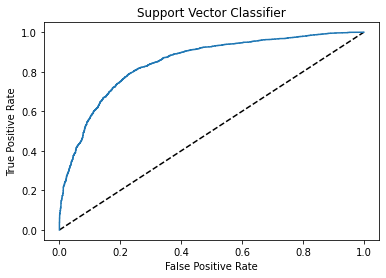

In [149]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Support Vector Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Classifier")
plt.show()

In [150]:
auc_score=roc_auc_score(y_test3,svc1.predict(x_test3))
auc_score

0.7784859577194198

Presenting the auc roc curve and the score is almost equal to the accuracy score.

# HyperParameter Tuning

In [151]:
parameter={"gamma":['scale','auto'],
          "degree":np.arange(2,20),
          "C":np.arange(2,10),
          "max_iter":np.arange(2,10)}

In [152]:
gcv=GridSearchCV(SVC(),parameter,cv=5)

In [153]:
gcv.fit(x_train3,y_train3)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'degree': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'gamma': ['scale', 'auto'],
                         'max_iter': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [154]:
gcv.best_params_

{'C': 3, 'degree': 2, 'gamma': 'scale', 'max_iter': 2}

# Final Model

In [158]:
svc1=SVC(kernel="rbf",probability=True,C=3,degree=2)
svc1.fit(x_train3,y_train3)
pred=svc1.predict(x_test3)
print("Accuracy score",accuracy_score(y_test3,pred))
print(classification_report(y_test3,pred))

Accuracy score 0.8023036253776435
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2591
           1       0.80      0.82      0.81      2705

    accuracy                           0.80      5296
   macro avg       0.80      0.80      0.80      5296
weighted avg       0.80      0.80      0.80      5296



# Saving the model

In [159]:
joblib.dump(svc1,'avocadoclassi.pkl')

['avocadoclassi.pkl']